# WeatherPy

---

## Script to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt #data viz
import pandas as pd #data analysis and manipulation
import numpy as np #mathmatical functions to operate within multi-dimensional arrays and matrices
import requests #send HTTP requests using Python (returns response object)
import time #python module
from scipy.stats import linregress #stats functionality
!pip install citipy #allows user to look for nearest city with geo coordinates
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)#take iterables and returns aggreated tuples

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 615
['khatanga', 'rikitea', 'ahuimanu', 'cabo san lucas', 'punta arenas', 'east london', 'yulara', 'constitucion', 'illoqqortoormiut', 'sinnamary', 'busselton', 'norman wells', 'atuona', 'salalah', 'yellowknife', 'hasaki', 'hobart', 'ciras', 'aiken', 'tambacounda', 'kodiak', 'chokurdakh', 'new norfolk', 'ribeira grande', 'vila franca do campo', 'yashkul', 'haverfordwest', 'namatanai', 'ushuaia', 'thompson', 'kautokeino', 'hilo', 'hammerfest', 'colares', 'ormara', 'saleaula', 'mareeba', 'avarua', 'champerico', 'masjed-e soleyman', 'saldanha', 'portland', 'janauba', 'black river', 'kidodi', 'alice springs', 'jalu', 'sentyabrskiy', 'port alfred', 'mouzakion', 'puerto ayora', 'albany', 'tabarqah', 'killybegs', 'grindavik', 'opuwo', 'tautira', 'maumere', 'barrow', 'solnechnyy', 'puerto escondido', 'bethel', 'severnoye', 'comodoro rivadavia', 'vaini', 'makakilo city', 'pahrump', 'bluff', 'saint-philippe', 'dunedin', 'pevek', 'eregli', 'upernavik', 'mar del plata

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #going to use F

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities): #enumerate() method adds counter to iterable
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50): #if index divisible by 50 and >=50, create new set to log
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    time.sleep(0.5) #limiting speed of calls to avoid account lockout
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ahuimanu
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | sinnamary
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | ciras
City not found. Skipping...
Processing Record 19 of Set 1 | aiken
Processing Record 20 of Set 1 | tambacounda
Processing Record 21 of Set 1 | kodiak
Processing Re

Processing Record 32 of Set 4 | zolotinka
City not found. Skipping...
Processing Record 33 of Set 4 | hualmay
Processing Record 34 of Set 4 | souillac
Processing Record 35 of Set 4 | mount isa
Processing Record 36 of Set 4 | lorengau
Processing Record 37 of Set 4 | kushima
Processing Record 38 of Set 4 | kerrville
Processing Record 39 of Set 4 | haines junction
Processing Record 40 of Set 4 | husavik
Processing Record 41 of Set 4 | mogadishu
Processing Record 42 of Set 4 | crab hill
City not found. Skipping...
Processing Record 43 of Set 4 | brahmapuri
City not found. Skipping...
Processing Record 44 of Set 4 | novoorsk
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | nemuro
Processing Record 48 of Set 4 | point pedro
Processing Record 49 of Set 4 | isiro
Processing Record 50 of Set 4 | isangel
Processing Record 1 of Set 5 | porosozero
Processing Record 2 of Set 5 | mattru
Processing Record 3 of Set 5 | gizo
Processing Re

Processing Record 22 of Set 8 | broken hill
Processing Record 23 of Set 8 | meiktila
Processing Record 24 of Set 8 | denpasar
Processing Record 25 of Set 8 | ostrovnoy
Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | san cristobal
Processing Record 28 of Set 8 | maragogi
Processing Record 29 of Set 8 | qaanaaq
Processing Record 30 of Set 8 | georgiyevskoye
Processing Record 31 of Set 8 | nuuk
Processing Record 32 of Set 8 | yarmouth
Processing Record 33 of Set 8 | ivolginsk
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | bonavista
Processing Record 36 of Set 8 | guiong
Processing Record 37 of Set 8 | madang
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | sao joao da barra
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | thinadhoo
Processing Record 43 of Set 8 | boda
Processing Record 44 of Set 8 | sri aman
Processing Record 45 of Set 8 | okha
Process

Processing Record 11 of Set 12 | ravar
Processing Record 12 of Set 12 | san juan
Processing Record 13 of Set 12 | clarence town
Processing Record 14 of Set 12 | muisne
Processing Record 15 of Set 12 | acarau
Processing Record 16 of Set 12 | porto feliz
Processing Record 17 of Set 12 | laguna
Processing Record 18 of Set 12 | sao jose da coroa grande
Processing Record 19 of Set 12 | moose jaw
Processing Record 20 of Set 12 | dunda
Processing Record 21 of Set 12 | caravelas
Processing Record 22 of Set 12 | epe
Processing Record 23 of Set 12 | mwinilunga
Processing Record 24 of Set 12 | mantenopolis
Processing Record 25 of Set 12 | robertsport
Processing Record 26 of Set 12 | camacha
Processing Record 27 of Set 12 | el dovio
Processing Record 28 of Set 12 | chicama
Processing Record 29 of Set 12 | yar-sale
Processing Record 30 of Set 12 | maua
Processing Record 31 of Set 12 | itaituba
Processing Record 32 of Set 12 | verkhnetulomskiy
Processing Record 33 of Set 12 | punalur
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,10.22,93,100,14.09,RU,1676335766
1,rikitea,-23.1203,-134.9692,79.45,68,100,5.77,PF,1676335767
2,ahuimanu,21.4447,-157.8378,80.31,69,20,17.27,US,1676335768
3,cabo san lucas,22.8909,-109.9124,70.90,59,40,16.11,MX,1676335509
4,punta arenas,-53.1500,-70.9167,48.31,66,40,16.11,CL,1676335770


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,71.9667,102.5000,10.22,93,100,14.09,RU,1676335766
1,rikitea,-23.1203,-134.9692,79.45,68,100,5.77,PF,1676335767
2,ahuimanu,21.4447,-157.8378,80.31,69,20,17.27,US,1676335768
3,cabo san lucas,22.8909,-109.9124,70.90,59,40,16.11,MX,1676335509
4,punta arenas,-53.1500,-70.9167,48.31,66,40,16.11,CL,1676335770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

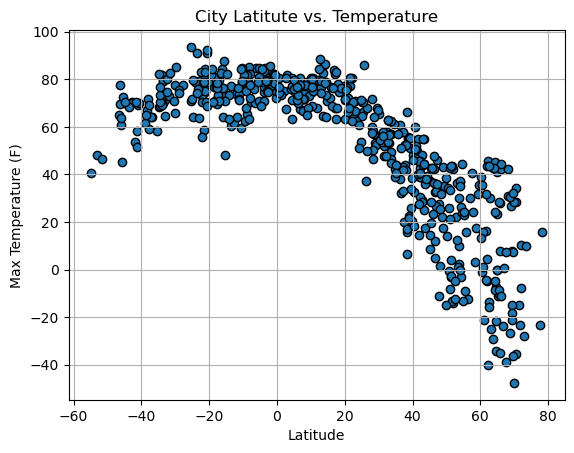

In [8]:
# Build scatter plot for latitude vs. temperature
Lat = city_data_df["Lat"]
Max_Temp = city_data_df["Max Temp"]

plt.scatter(Lat, Max_Temp, edgecolor="black", marker = "o")
           
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitute vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()
#NOTE: y-labels use imperial system

#### Latitude Vs. Humidity

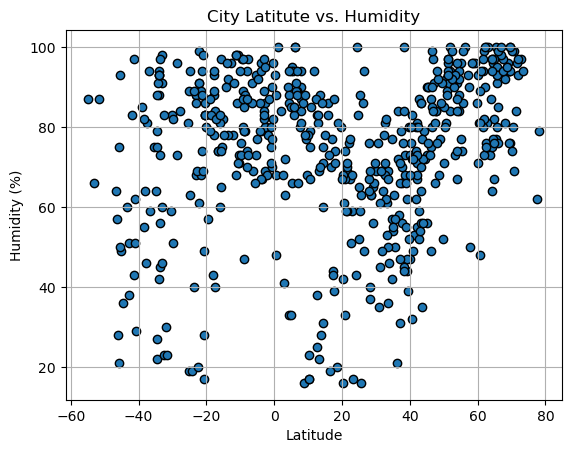

In [9]:
# Build the scatter plots for latitude vs. humidity
Humidity = city_data_df["Humidity"]

plt.scatter(Lat, Humidity, edgecolor="black", marker = "o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitute vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

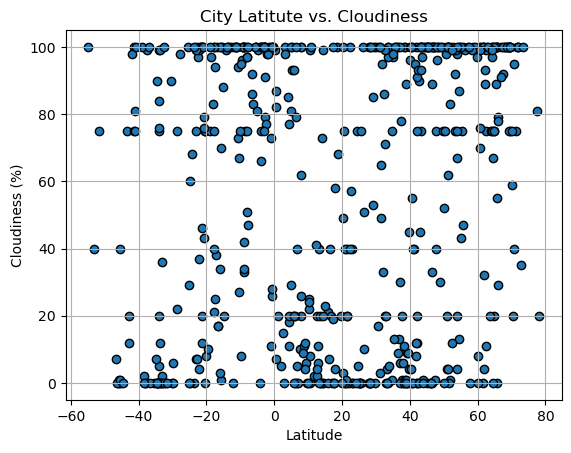

In [10]:
# Build the scatter plots for latitude vs. cloudiness
Cloudiness = city_data_df["Cloudiness"]

plt.scatter(Lat, Cloudiness, edgecolor="black", marker = "o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitute vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

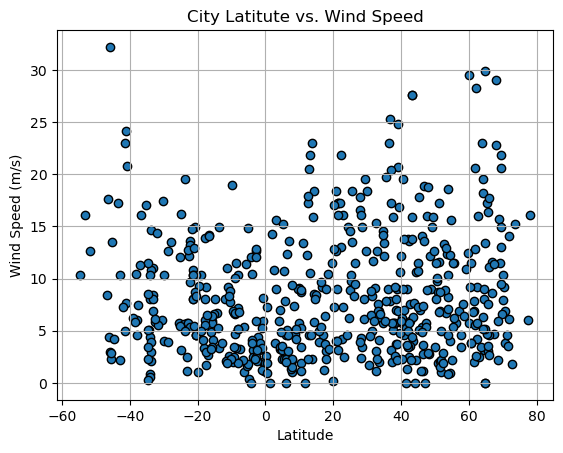

In [11]:
# Build the scatter plots for latitude vs. wind speed
Wind_Speed = city_data_df["Wind Speed"]

plt.scatter(Lat, Wind_Speed, edgecolor="black", marker = "o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitute vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plotlinregress (x_values, y_values, title, x_label, y_label, text_coordinates):
    
    #regression values calc
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept 
    
    # Create line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-") 
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=13, color="green")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()   
    
    #print r value for reference
    print(f"The value of r is {rvalue}")
    


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,71.9667,102.5000,10.22,93,100,14.09,RU,1676335766
2,ahuimanu,21.4447,-157.8378,80.31,69,20,17.27,US,1676335768
3,cabo san lucas,22.8909,-109.9124,70.90,59,40,16.11,MX,1676335509
8,sinnamary,5.3833,-52.9500,75.96,95,100,10.71,GF,1676335775
10,norman wells,65.2820,-126.8329,-11.16,77,100,17.27,CA,1676335777


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,79.45,68,100,5.77,PF,1676335767
4,punta arenas,-53.1500,-70.9167,48.31,66,40,16.11,CL,1676335770
5,east london,-33.0153,27.9116,72.21,91,2,10.98,ZA,1676335771
6,yulara,-25.2406,130.9889,93.58,19,29,12.06,AU,1676335772
7,constitucion,-35.3333,-72.4167,58.23,75,0,17.07,CL,1676335557


###  Temperature vs. Latitude Linear Regression Plot

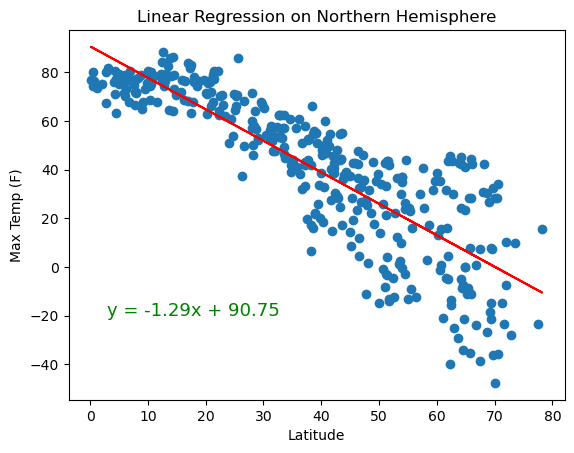

The value of r is -0.8472020797133276


In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plotlinregress(x_values, y_values, "Linear Regression on Northern Hemisphere", "Latitude",
                "Max Temp (F)", (3,-20))
plt.show()


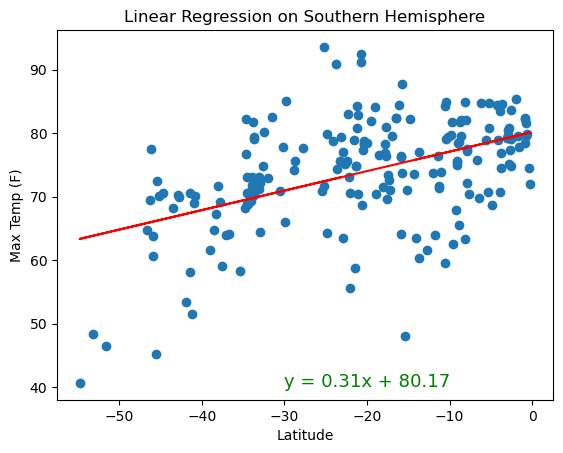

The value of r is 0.48369763164220064


In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plotlinregress(x_values, y_values, "Linear Regression on Southern Hemisphere", "Latitude",
                "Max Temp (F)", (-30,40))

plt.show()

**Discussion about the linear relationship:** The above scatterplots were generated with the intent of measuring the correlation between latitude and max temperature (in fahrenheit), first for cities located within the Northern Hemisphere, and subsequently for cities located within the Southern Hemisphere. 

This evaluation revealed a relatively strong negative correlation between max temperature and latitude for cities located in the Northern Hemisphere. The calculated correlation coefficient r, which quantifies the degree of the linear relationship between the two variables being measured, was roughly -0.85. This indicates a relatively strong trend between lower (colder) temperatures as the cities' geographic location moved farther North.

The calculated value of r between the variables of latitutde and max temperature for cities located in the Southern Hemisphere was approximately 0.48. This communicates a weak positive correlation between the variables, revealing a loose, general trend of rising max temperatures as the city location moves from the South Pole towards the equator. 

### Humidity vs. Latitude Linear Regression Plot

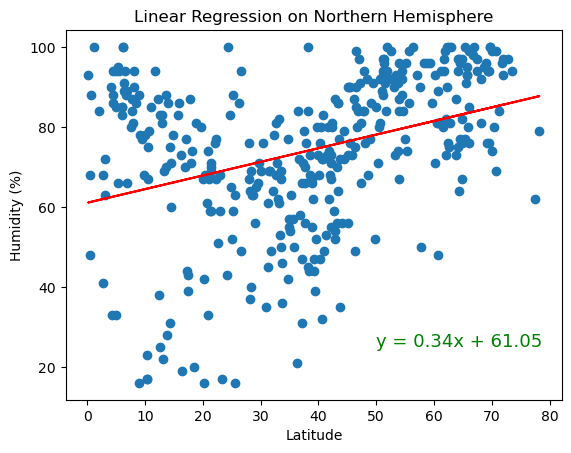

The value of r is 0.35347743995713315


In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plotlinregress(x_values, y_values, "Linear Regression on Northern Hemisphere", "Latitude",
                "Humidity (%)", (50,25))

plt.show()


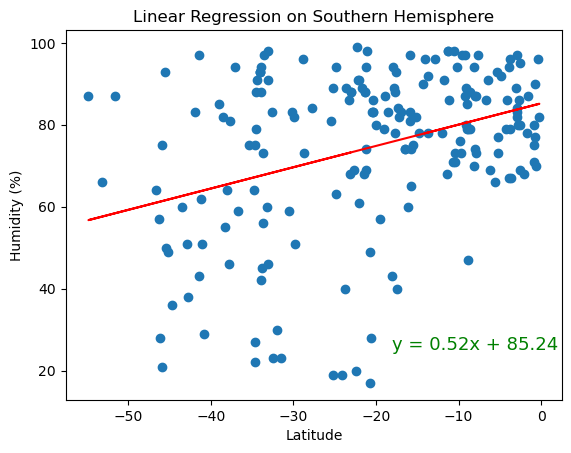

The value of r is 0.35626382488994185


In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plotlinregress(x_values, y_values, "Linear Regression on Southern Hemisphere", "Latitude",
                "Humidity (%)", (-18,25))

plt.show()

**Discussion about the linear relationship:** The above scatterplots were generated with the intent of measuring the correlation between latitude and humidity, for cities located in the Northern and Southern Hemispheres. The calculated r values were roughly 0.35 and 0.36, respectively. This indicates a very weak positive correlation between the measures. Given this figure, no trend is readily apparent. 


### Cloudiness vs. Latitude Linear Regression Plot

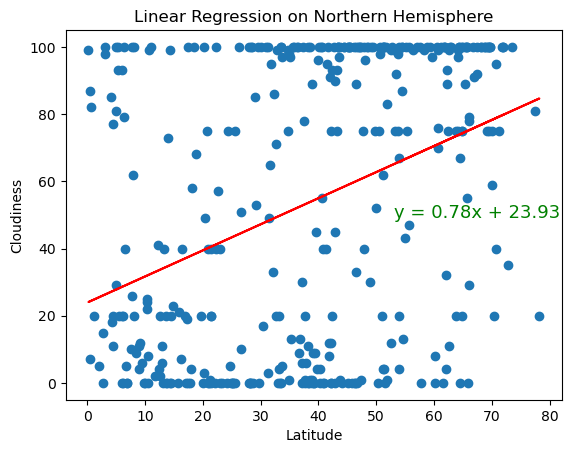

The value of r is 0.37309165729150445


In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plotlinregress(x_values, y_values, "Linear Regression on Northern Hemisphere", "Latitude",
                "Cloudiness", (53,49))

plt.show()

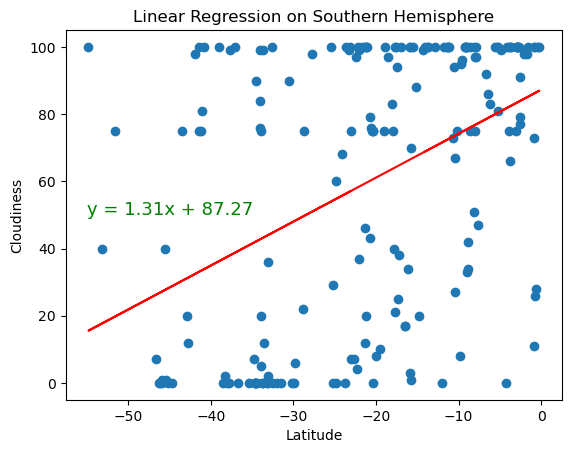

The value of r is 0.43864523546473033


In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plotlinregress(x_values, y_values, "Linear Regression on Southern Hemisphere", "Latitude",
                "Cloudiness", (-55,50))

plt.show()

**Discussion about the linear relationship:** The above scatterplots were generated with the intent of measuring the correlation between latitude and cloudiness, for cities located in the Northern and Southern Hemispheres. The calculated r values were roughly 0.37 and 0.44, respectively. This indicates a very weak positive correlation between the measures. Given this figure, no trend is readily apparent. 

### Wind Speed vs. Latitude Linear Regression Plot

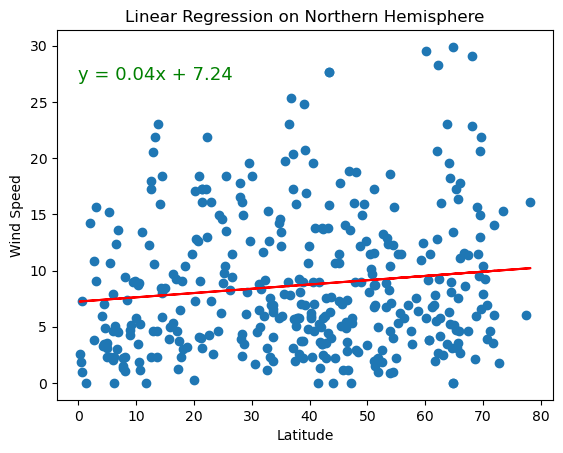

The value of r is 0.12507033046498656


In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plotlinregress(x_values, y_values, "Linear Regression on Northern Hemisphere", "Latitude",
                "Wind Speed", (0,27))

plt.show()

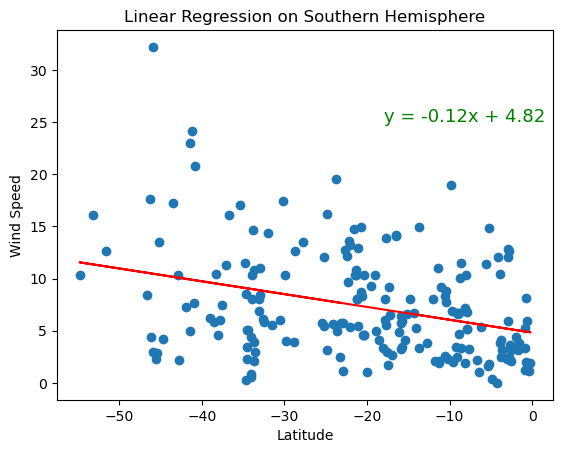

The value of r is -0.32859793276145466


In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plotlinregress(x_values, y_values, "Linear Regression on Southern Hemisphere", "Latitude",
                "Wind Speed", (-18,25))

plt.show()

**Discussion about the linear relationship:** The above scatterplots were generated with the intent of measuring the correlation between latitude and wind speed, for cities located in the Northern and Southern Hemispheres. The calculated r values were roughly 0.13 and -0.33, respectively. This indicates a very weak positive and negative correlation between the measures. Given this low degree of correlation, no trends are readily apparent. 